In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our convnet so far:

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [24]:
filename = './results/model_summary.txt'
summary_str = []
model.summary(print_fn=lambda x: summary_str.append(x))
summary_str = '\n'.join(summary_str)
import os
if not os.path.exists('results'):
    os.makedirs('results')

# Write the summary into the file
with open(filename, 'w') as f:
    f.write(summary_str)

print(f"Model summary has been written to {filename}")

Model summary has been written to ./results/model_summary.txt


In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



NameError: name 'summary_str' is not defined

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
x_val =train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 16s 20ms/step - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.0180 - val_accuracy: 0.9942
Epoch 2/5
782/782 [==============================] - 16s 20ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0280 - val_accuracy: 0.9924
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.0210 - val_accuracy: 0.9939
Epoch 4/5
782/782 [==============================] - 16s 20ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0237 - val_accuracy: 0.9947
Epoch 5/5
782/782 [==============================] - 16s 20ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0276 - val_accuracy: 0.9939


Let's evaluate the model on the test data:

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9904


In [18]:
test_acc

0.9904000163078308

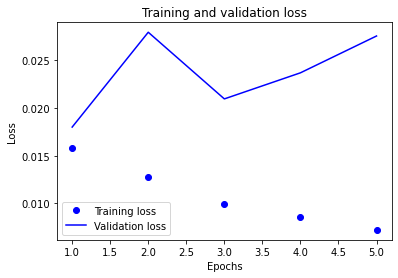

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

filename_plot = './results/taining_val_lss.png'

plt.savefig(filename_plot)
plt.show()
plt.close()

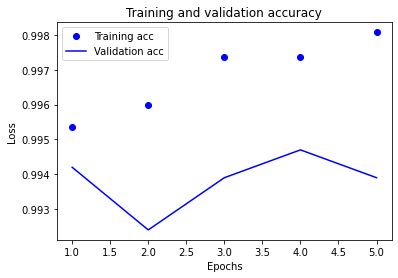

In [30]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

filename_plot = './results/taining_val_acc.png'
plt.savefig(filename_plot)
plt.show()
plt.close()

In [26]:
predictions = model.predict(test_images)

# Convert the predictions to a string
predictions_str = '\n'.join(map(str, predictions.flatten()))

# Specify the subdirectory and the filename
filename_predictions = './results/model_predictions.txt'

# Write the predictions into the file
with open(filename_predictions, 'w') as f:
    f.write(predictions_str)

print(f"Model predictions have been written to {filename_predictions}")

Model predictions have been written to ./results/model_predictions.txt
